## Phase 3

Here i will solving this two question

#### Question :-3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/UT, district, murders, and year in descending order.

#### Question :- 3.8.4 Use appropriate graphs to show your data (the result of 3.8.3).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('E:\\Yaminee\\Data Trained\\Yaminee Tiwari\\Project\\Final project work\\IPC_Murder_data.csv')

In [6]:
data.head()

,STATE_UT,YEAR,DISTRICT,MURDER
0,A & N ISLANDS,2001,ANDAMAN,13
1,A & N ISLANDS,2002,ANDAMAN,14
2,A & N ISLANDS,2003,ANDAMAN,16
3,A & N ISLANDS,2004,ANDAMAN,13
4,A & N ISLANDS,2005,ANDAMAN,14


In [12]:
# Group by District and count the number of years each district appears
district_years_count = data.groupby('DISTRICT')['YEAR'].nunique().reset_index()
district_years_count = district_years_count[district_years_count['YEAR'] >= 3]

# Merge with the original data to filter only the districts that appear 3 or more years
filtered_data = pd.merge(data, district_years_count[['DISTRICT']], on='DISTRICT', how='inner')

# Sort by year in descending order
sorted_data = filtered_data.sort_values(by='YEAR', ascending=False)


In [20]:
df=sorted_data[['STATE_UT','DISTRICT','MURDER','YEAR']]
df

,STATE_UT,DISTRICT,MURDER,YEAR
357,WEST BENGAL,24 PARGANAS SOUTH,224,2012
108,GOA,NORTH GOA,28,2012
23,ARUNACHAL PRADESH,LOHIT,11,2012
346,UTTARAKHAND,HARIDWAR,74,2012
149,JAMMU & KASHMIR,JAMMU,13,2012
...,...,...,...,...
160,KARNATAKA,BANGALORE COMMR.,221,2001
58,CHHATTISGARH,SARGUJA,105,2001
332,UTTAR PRADESH,MUZAFFARNAGAR,324,2001
278,PUNJAB,JALANDHAR,74,2001


#### Question 3.8.4	Use appropriate graphs to show your data (the result of 3.8.3).

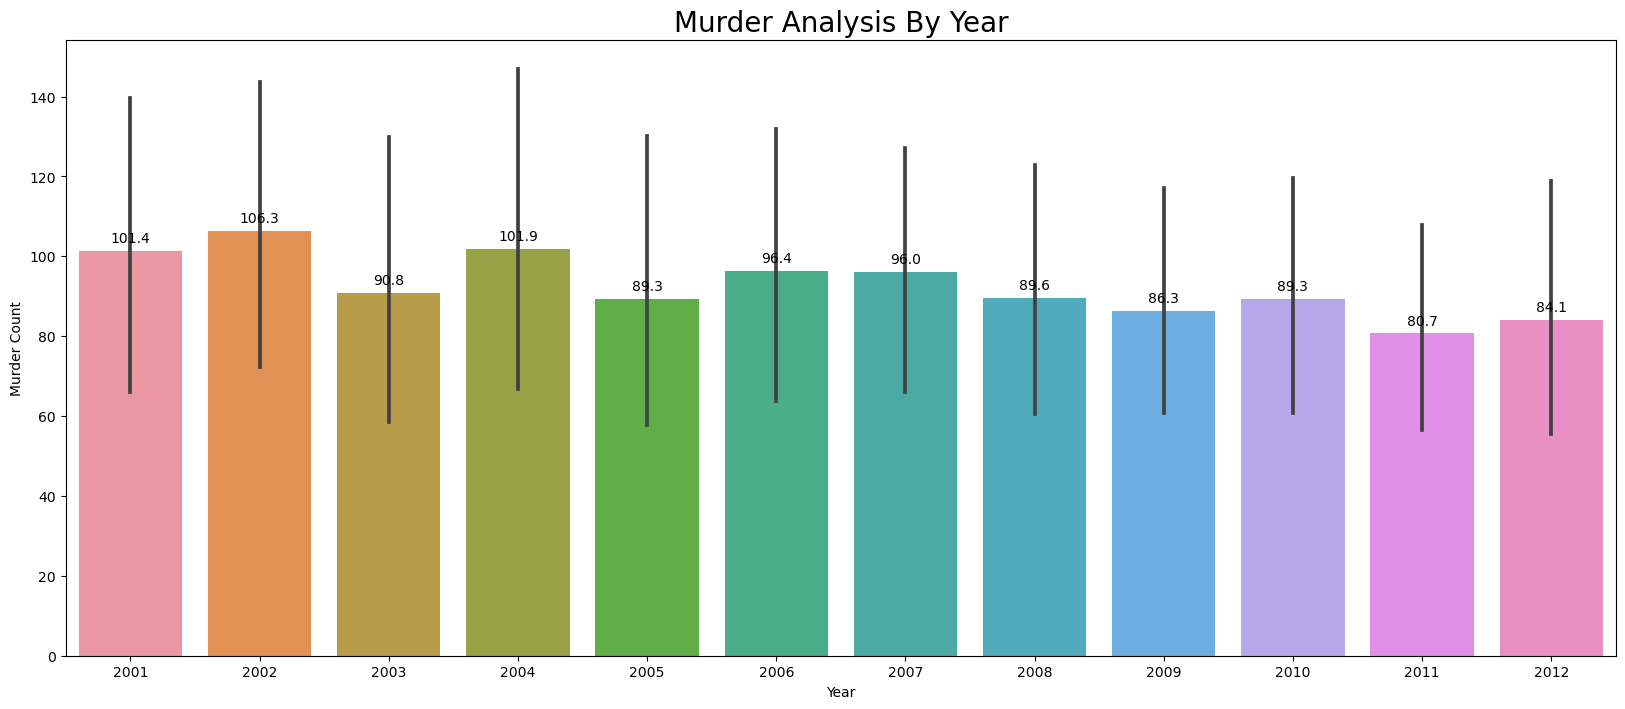

In [41]:
plt.figure(figsize=(20,8))
ax = sns.barplot(data=df, x='YEAR', y='MURDER')

# Annotate each bar with the corresponding value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Murder Analysis By Year', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Murder Count')
plt.show()

**Title: Murder Analysis By Year**
Y-axis: Murder Count
X-axis: Year (2001-2012)
Observations:
The average murder count per year fluctuates between approximately 80 and 106.
The highest average murder count is in 2002, followed closely by 2004.
There is a general declining trend in murder counts from 2005 onwards, with some fluctuations.
The lowest average murder count is in 2011.


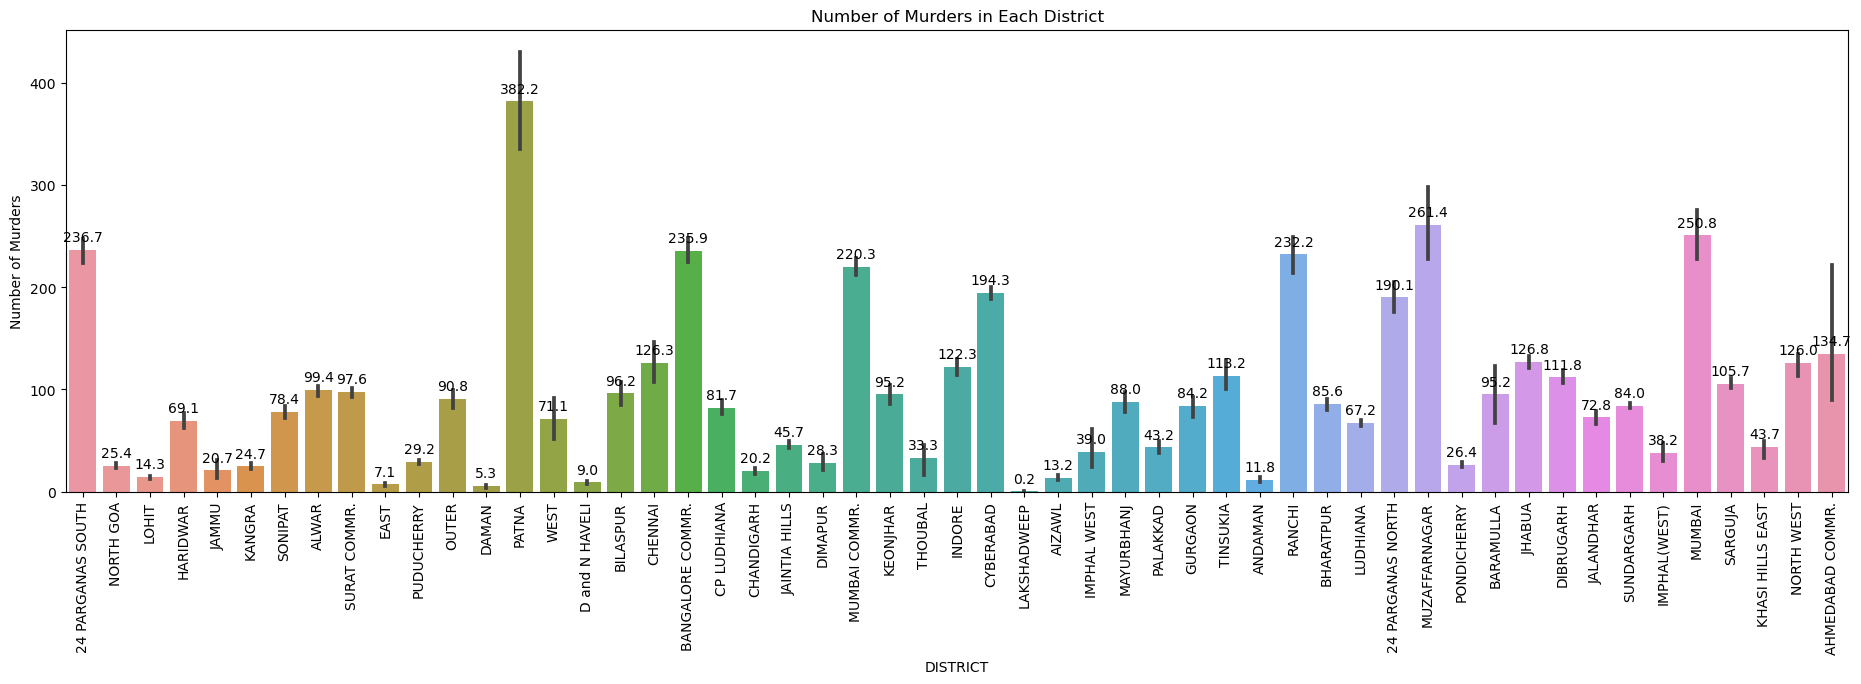

In [39]:
# Bar plot for murders in each district per year
plt.figure(figsize=(23, 6))
ax=sns.barplot(data=df, x='DISTRICT', y='MURDER')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Number of Murders in Each District')
plt.xlabel('DISTRICT')
plt.ylabel('Number of Murders')
plt.xticks(rotation=90)
plt.show()

**Murder Analysis Murder in Each District**
•	Peak: Highest count in Patna District
•	Lowest count in Lakshadweep  


Text(0.5, 1.0, 'Murder Analysis Of each State/UT By Year')

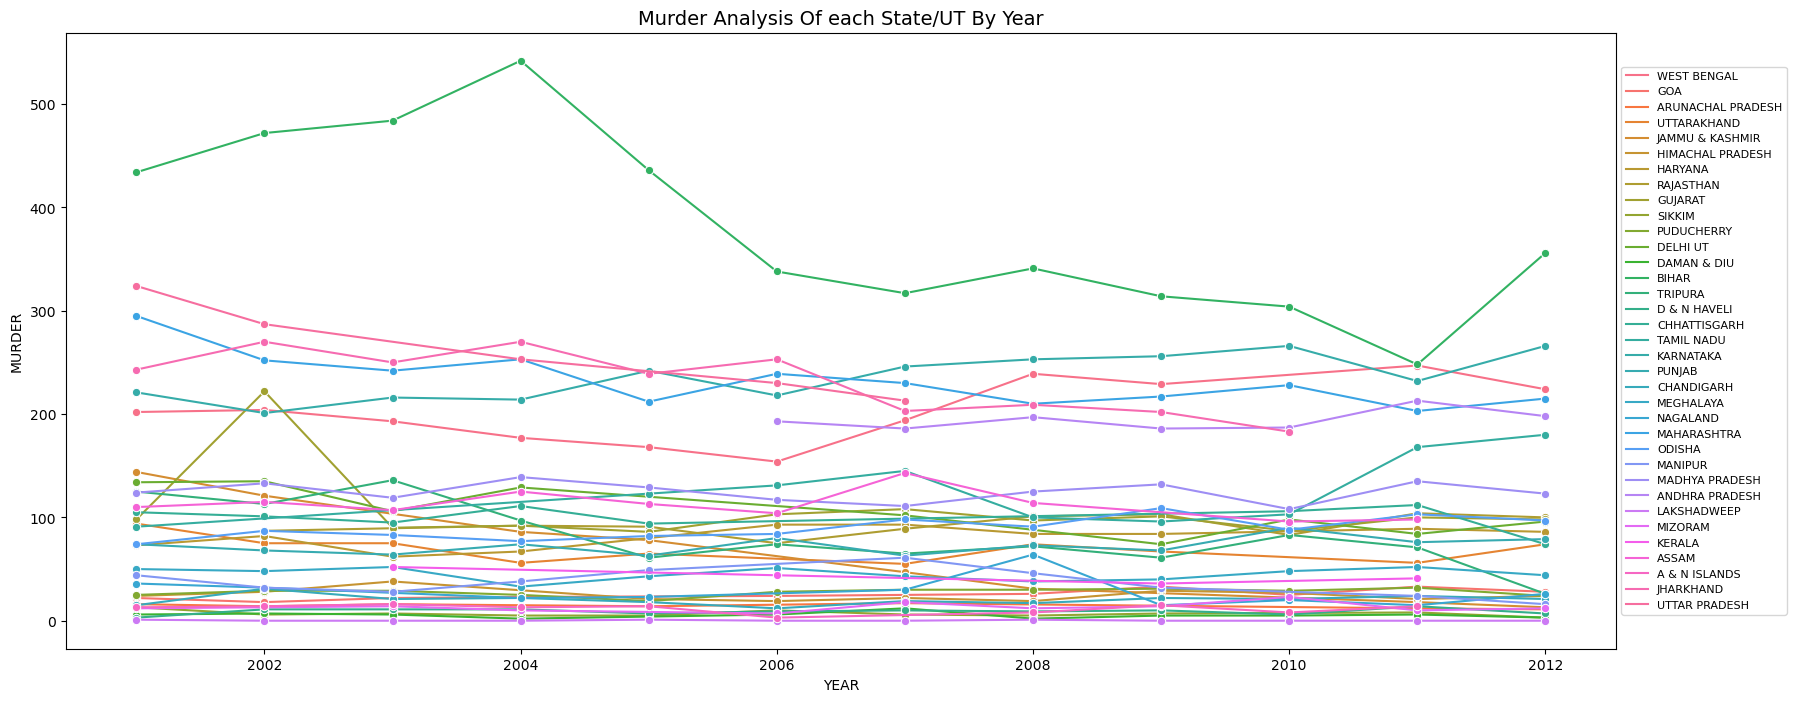

In [36]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='YEAR',y='MURDER',hue='STATE_UT',marker='o')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
plt.title('Murder Analysis Of each State/UT By Year',fontsize=14)

**Title: Murder Analysis of each State/UT By Year**
Y-axis: Murder count
X-axis: Year (2001-2012)
Observations:
The murder count varies significantly across different states/UTs.
Some states/UTs have a consistent pattern over the years, while others show a high degree of variability.
One particular state/UT (represented by the top green line) has significantly higher murder counts compared to others, especially around 2004-2005.
There is a general trend of declining murder counts for the top states/UTs after the peak around 2004-2005.
The lower murder count states/UTs (bottom lines) remain relatively stable over the years